# Binary Search Trees, Traversals and Balancing in Python

## Problem

> **QUESTION 1**: As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
> 
> 1. Insert the profile information for a new user.
> 2. Find the profile information of a user, given their username
> 3. Update the profile information of a user, given their usrname
> 4. List all the users of the platform, sorted by username
>
> You can assume that usernames are unique.

## 1. State the problem clearly. Identify the input & output formats.

### Problem

>
> We need to create a data structure which can store 100 million records and perform insertion, search, update and list operations efficiently.
>

In [1]:
class User:
    pass

In [2]:
user1 = User()

In [5]:
print(user1)
type(user1)

__main__.User

In [8]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User created!')

In [9]:
user2 = User('john', 'John Doe', 'john@doe.com')

User created!


In [10]:
user2.name

'John Doe'

#### Input

In [11]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User created!')

    def __repr__(self):
        return f"User(username= {self.username}, name= {self.name}, email= {self.email})"

    def __str__(self):
        return self.__repr__()

Methods `__repr__` and `__str__` will help display userobject nicely within Jupyter.

In [12]:
user3 = User('jane', 'Jane Doe', 'jane@doe.com')

User created!


In [13]:
user3

User(username= jane, name= Jane Doe, email= jane@doe.com)

#### Output

In [15]:
class UserDatabase:
    def __init__(self):
        pass
        
    def insert(self, user):
        pass
    
    def find(self, username):
        pass
    
    def update(self, user):
        pass
        
    def list_all(self):
        pass

## 2. Come up with some example inputs & outputs.

In [16]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

User created!
User created!
User created!
User created!
User created!
User created!
User created!


In [17]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]

In [19]:
print(aakash)

User(username= aakash, name= Aakash Rai, email= aakash@example.com)


In [20]:
users

[User(username= aakash, name= Aakash Rai, email= aakash@example.com),
 User(username= biraj, name= Biraj Das, email= biraj@example.com),
 User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com),
 User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com),
 User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com),
 User(username= sonaksh, name= Sonaksh Kumar, email= sonaksh@example.com),
 User(username= vishal, name= Vishal Goel, email= vishal@example.com)]

## 3. Come up with a correct solution. State it in plain English.

The various functions can be implemented as follows:

1. Insert: Loop through the list and add the new user at a position that keeps the list sorted.
2. Find: Loop through the list and find the user object with the username matching the query.
3. Update: Loop through the list, find the user object matching the query and update the details
4. List: Return the list of user objects.

## 4. Implement the solution and test it using example inputs.

In [30]:
class UserDatabase:
    def __init__(self):
        self.users = []
    
    def insert(self, user):
        i = 0
        while i < len(self.users):
            # Find the first username greater than the new user's username
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)
    
    def find(self, username):
        for user in self.users:
            if user.username == username:
                return user
    
    def update(self, user):
        target = self.find(user.username)
        target.name, target.email = user.name, user.email
        
    def list_all(self):
        return self.users

In [31]:
database = UserDatabase()

In [32]:
database.insert(hemanth)
database.insert(aakash)
database.insert(siddhant)

In [33]:
user = database.find('siddhant')
user

User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com)

In [34]:
database.update(User(username='siddhant', name='Siddhant U', email='siddhantu@example.com'))

User created!


In [35]:
user = database.find('siddhant')
user

User(username= siddhant, name= Siddhant U, email= siddhantu@example.com)

In [36]:
database.list_all()

[User(username= aakash, name= Aakash Rai, email= aakash@example.com),
 User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com),
 User(username= siddhant, name= Siddhant U, email= siddhantu@example.com)]

In [37]:
database.insert(biraj)

In [38]:
database.list_all()

[User(username= aakash, name= Aakash Rai, email= aakash@example.com),
 User(username= biraj, name= Biraj Das, email= biraj@example.com),
 User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com),
 User(username= siddhant, name= Siddhant U, email= siddhantu@example.com)]

## 5. Analyze the algorithm's time complexity and identify inefficiencies

1. Insert: **O(N)**
2. Find: **O(N)**
3. Update: **O(N)**
4. List: **O(1)**

In [39]:
%%time
for i in range(100000000):
    j = i*i

CPU times: user 9.27 s, sys: 1.88 ms, total: 9.27 s
Wall time: 9.48 s


Too much time!

## 6. Apply the right technique to overcome the inefficiency

We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a binary tree:

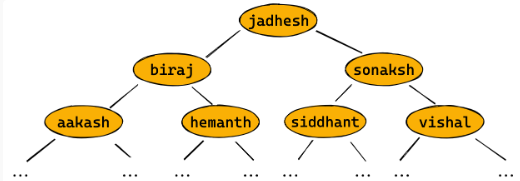

It's called a tree because it vaguely like an inverted tree trunk with branches.

- The word "binary" indicates that each "node" in the tree can have at most 2 children (left or right).
- Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
- The single node at the top is called the "root" node, and it typically where operations like search, insertion etc. begin.

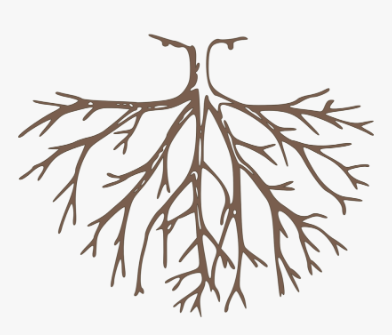

### Balanced Binary Search

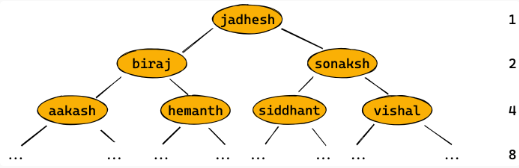

For our use case, we require the binary tree to have some additional properties:

1. Keys and Values: Each node of the tree stores a key (a username) and a value (a User object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a map or treemap (because it maps keys to values).
2. Binary Search Tree: The left subtree of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the right subtree of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called a binary search trees, and it's easy to locate a specific key by traversing a single path down from the root note.
3. Balanced Tree: The tree is balanced i.e. it does not skew too heavily to one side or the other. The left and right subtrees of any node shouldn't differ in height/depth by more than 1 level.

#### Height of a Binary Tree

The number of levels in a tree is called its height. As you can tell from the picture above, each level of a tree contains twice as many nodes as the previous level.

For a tree of height k, here's a list of the number of nodes at each level:

Level 0: 1

Level 1: 2

Level 2: 4 i.e. 2^2

Level 3: 8 i.e. 2^3

...

Level k-1: 2^(k-1)

If the total number of nodes in the tree is N, then it follows that

    N = 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1)
We can simplify this equation by adding 1 on each side:

    N + 1 = 1 + 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1) 

    N + 1 = 2^1 + 2^1 + 2^2+ 2^3 + ... + 2^(k-1) 

    N + 1 = = 2^2 + 2^2 + 2^3 + ... + 2^(k-1)

    N + 1 = = 2^3 + 2^3 + ... + 2^(k-1)

    ...

    N + 1 = 2^(k-1) + 2^(k-1)

    N + 1 = 2^k

    k = log(N + 1) <= log(N) + 1 

Thus, to store `N` records we require a balanced binary search tree (BST) of height no larger than `log(N) + 1`. This is a very useful property, in combination with the fact that nodes are arranged in a way that makes it easy to find a specific key by following a single path down from the root.

As we'll see soon, the `insert`, `find` and `update` operations in a balanced BST have time complexity `O(log N)` since they all involve traversing a single path down from the root of the tree.

### Binary Tree

Creating a simple binary tree in Python.

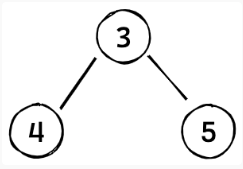

In [40]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

In [41]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

node0, node0.key

In [43]:
node0.left = node1
node0.right = node2

In [68]:
tree = node0
tree.key, tree.left.key, tree.right.key

(3, 4, 5)

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.

Exercise: Create the following binary tree using the TreeNode class defined above.

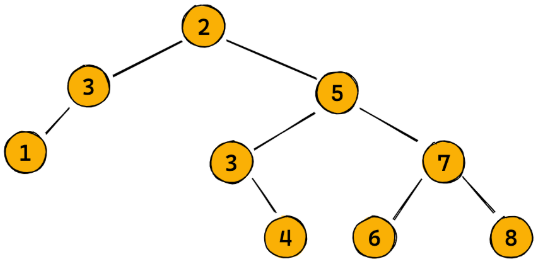

In [50]:
node = TreeNode(2)
node.left = TreeNode(3)
node.left.left = TreeNode(1)
node.right = TreeNode(5)
node.right.left = TreeNode(3)
node.right.left.right = TreeNode(4)
node.right.right = TreeNode(7)
node.right.right.left = TreeNode(6)
node.right.right.left = TreeNode(8)

In [52]:
tree = node
tree.left.key, tree.key, tree.right.key

(3, 2, 5)

In [53]:
tree_tuple = ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [54]:
def parse_tuple(data):
    # print(data)
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [55]:
tree2 = parse_tuple(((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8))))
tree2

In [56]:
tree2.key

2

In [57]:
tree2.left.key, tree2.right.key

(3, 5)

In [58]:
tree2.left.left.key, tree2.left.right, tree2.right.left.key, tree2.right.right.key

(1, None, 3, 7)

In [59]:
tree2.right.left.right.key, tree2.right.right.left.key, tree2.right.right.right.key

(4, 6, 8)

In [64]:
def tree_to_tuple(node):
    if node == None:
        return None
    return (tree_to_tuple(node.left), node.key, tree_to_tuple(node.right))

In [65]:
tree3 = tree_to_tuple(tree2)
tree3

(((None, 1, None), 3, None),
 2,
 ((None, 3, (None, 4, None)), 5, ((None, 6, None), 7, (None, 8, None))))

In [66]:
def display_keys(node, space='\t', level=0):
    # print(node.key if node else None, level)
    
    # If the node is empty
    if node is None:
        print(space*level + '∅')
        return   
    
    # If the node is a leaf 
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key))
    display_keys(node.left,space, level+1) 

In [67]:
display_keys(tree2, '  ')

      8
    7
      6
  5
      4
    3
      ∅
2
    ∅
  3
    1


### Traversing a Binary Tree

A *traversal* refers to the process of visiting each node of a tree exactly once. Visiting a node generally refers to adding the node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys:

#### Inorder traversal

1. Traverse the left subtree recursively inorder.
2. Traverse the current node.
3. Traverse the right subtree recursively inorder.

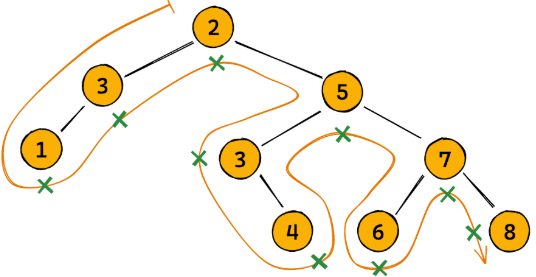

#### Preorder traversal

1. Traverse the current node.
2. Traverse the left subtree recursively preorder.
3. Traverse the right subtree recursively preorder.

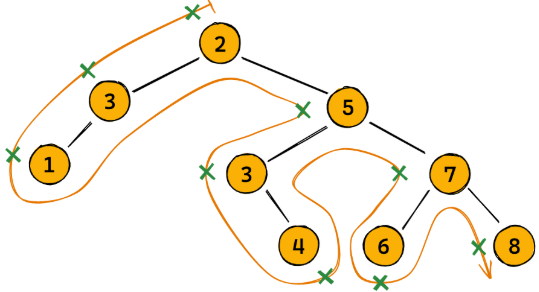

#### Postorder traversal

1. Traverse the left subtree recursively in postorder.
2. Traverse the right subtree recursively in postorder.
3. Visit the current node.

Following the example, it would be:
1 -> 3 -> 4 -> 3 -> 6 -> 8 -> 7 -> 5 -> 2

In [69]:
def traverse_in_order(node):
    if node is None: 
        return []
    return(traverse_in_order(node.left) + 
           [node.key] + 
           traverse_in_order(node.right))

In [70]:
traverse_in_order(tree2)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [75]:
def traverse_pre_order(node):
    if node is None: 
        return []
    return([node.key] +
            traverse_pre_order(node.left) +  
            traverse_pre_order(node.right))

In [76]:
traverse_pre_order(tree2)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

In [79]:
def traverse_post_order(node):
    if node is None: 
        return []
    return(traverse_post_order(node.left) +  
            traverse_post_order(node.right) +
            [node.key])

In [80]:
traverse_post_order(tree2)

[1, 3, 4, 3, 6, 8, 7, 5, 2]

### Height and Size of a Binary Tree

The *height/depth* of a binary tree is defined as the length of the longest path from its root node to a leaf. It can be computed recursively, as follows:

In [54]:
def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

In [55]:
tree_height(tree2)

3

In [56]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [84]:
tree_size(tree2)

9

### Ultimate Tree Node Class

In [2]:
class TreeNode():
    def __init__(self, key):
        self.key, self.left, self.right = key, None, None
    
    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        if self is None:
            return 0
        return 1 + TreeNode.size(self.left) + TreeNode.size(self.right)

    def traverse_in_order(self):
        if self is None: 
            return []
        return (TreeNode.traverse_in_order(self.left) + 
                [self.key] + 
                TreeNode.traverse_in_order(self.right))
    
    def display_keys(self, space='\t', level=0):
        # If the node is empty
        if self is None:
            print(space*level + '∅')
            return   

        # If the node is a leaf 
        if self.left is None and self.right is None:
            print(space*level + str(self.key))
            return

        # If the node has children
        display_keys(self.right, space, level+1)
        print(space*level + str(self.key))
        display_keys(self.left,space, level+1)    
    
    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return TreeNode.to_tuple(self.left),  self.key, TreeNode.to_tuple(self.right)
    
    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    def __repr__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    @staticmethod    
    def parse_tuple(data):
        if data is None:
            node = None
        elif isinstance(data, tuple) and len(data) == 3:
            node = TreeNode(data[1])
            node.left = TreeNode.parse_tuple(data[0])
            node.right = TreeNode.parse_tuple(data[2])
        else:
            node = TreeNode(data)
        return node

### Binary Seach Tree

A binary search tree or BST is a binary tree that satisfies the following conditions:

1. The left subtree of any node only contains nodes with keys less than the node's key
2. The right subtree of any node only contains nodes with keys greater than the node's key

It follows from the above conditions that every subtree of a binary search tree must also be a binary search tree.

In [15]:
def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
        
    is_bst_l, min_l, max_l = is_bst(node.left)
    is_bst_r, min_r, max_r = is_bst(node.right)
    #print(f"min_l: {min_l}, max_l: {max_l}, min_r: {min_r}, max_r: {max_r}")
    is_bst_node = (is_bst_l and is_bst_r and 
              (max_l is None or node.key > max_l) and 
              (min_r is None or node.key < min_r))
    
    min_key = min(remove_none([min_l, node.key, min_r]))
    max_key = max(remove_none([max_l, node.key, max_r]))
    
    #print(node.key, min_key, max_key, is_bst_node)
        
    return is_bst_node, min_key, max_key

The following tree is not a BST (because a node with the key 3 appears in the left subtree of a node with the key 2):

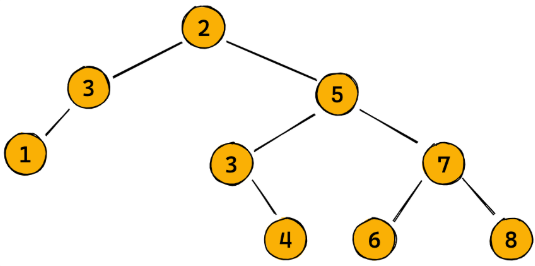

In [16]:
tree1 = TreeNode.parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))

In [17]:
is_bst(tree1)

(False, 1, 8)

On the other hand, the following tree is a BST:

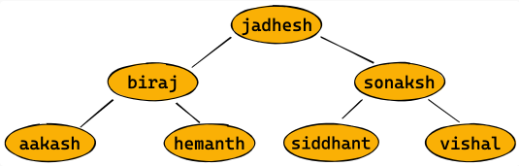

In [18]:
tree2 = TreeNode.parse_tuple((('aakash', 'biraj', 'hemanth')  , 'jadhesh', ('siddhant', 'sonaksh', 'vishal')))

In [19]:
is_bst(tree2)

(True, 'aakash', 'vishal')

#### Users copy

In [5]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User created!')

    def __repr__(self):
        return f"User(username= {self.username}, name= {self.name}, email= {self.email})"

    def __str__(self):
        return self.__repr__()

In [6]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

User created!
User created!
User created!
User created!
User created!
User created!
User created!


In [7]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]

In [13]:
def display_keys(node, space='\t', level=0):
    # print(node.key if node else None, level)
    
    # If the node is empty
    if node is None:
        print(space*level + '∅')
        return   
    
    # If the node is a leaf 
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key))
    display_keys(node.left,space, level+1) 

#### Storing Ket-Value Pairs using BSTs

Recall that we need to store user objects with each key in our BST. Let's define new class BSTNode to represent the nodes of of our tree. Apart from having properties key, left and right, we'll also store a value and pointer to the parent node (for easier upward traversal).

In [10]:
class BSTNode():
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

In [26]:
# Level 0
tree = BSTNode(jadhesh.username, jadhesh)

In [27]:
# View Level 0
tree.key, tree.value

('jadhesh',
 User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com))

In [28]:
# Level 1
tree.left = BSTNode(biraj.username, biraj)
tree.right = BSTNode(sonaksh.username, sonaksh)

In [29]:
# View Level 1
tree.left.key, tree.left.value, tree.right.key, tree.right.value

('biraj',
 User(username= biraj, name= Biraj Das, email= biraj@example.com),
 'sonaksh',
 User(username= sonaksh, name= Sonaksh Kumar, email= sonaksh@example.com))

In [32]:
display_keys(tree)

	sonaksh
jadhesh
	biraj


#### Insertion into BST

We use the BST-property to perform insertion efficiently:

1. Starting from the root node, we compare the key to be inserted with the current node's key
2. If the key is smaller, we recursively insert it in the left subtree (if it exists) or attach it as as the left child if no left subtree exists.
3. If the key is larger, we recursively insert it in the right subtree (if it exists) or attach it as as the right child if no right subtree exists.

Here's a recursive implementation of `insert`.

In [16]:
def insert(node, key, value):
    if node is None:
        node = BSTNode(key, value)
    elif key < node.key:
        node.left = insert(node.left, key, value)
        node.left.parent = node
    elif key > node.key:
        node.right = insert(node.right, key, value)
        node.right.parent = node
    return node

In [34]:
tree = insert(None, jadhesh.username, jadhesh)

In [35]:
insert(tree, biraj.username, biraj)
insert(tree, sonaksh.username, sonaksh)
insert(tree, aakash.username, aakash)
insert(tree, hemanth.username, hemanth)
insert(tree, siddhant.username, siddhant)
insert(tree, vishal.username, siddhant)

In [36]:
display_keys(tree)

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


Note, however, that the order of insertion of nodes change the structure of the resulting tree.

In [38]:
tree2 = insert(None, aakash.username, aakash)
insert(tree2, biraj.username, biraj)
insert(tree2, hemanth.username, hemanth)
insert(tree2, jadhesh.username, jadhesh)
insert(tree2, siddhant.username, siddhant)
insert(tree2, sonaksh.username, sonaksh)
insert(tree2, vishal.username, vishal)

In [39]:
display_keys(tree2)

						vishal
					sonaksh
						∅
				siddhant
					∅
			jadhesh
				∅
		hemanth
			∅
	biraj
		∅
aakash
	∅



Skewed/unbalanced BSTs are problematic because the height of such trees often ceases to logarithmic compared to the number of nodes in the tree. For instance the above tree has 7 nodes and height 7.

The length of the path traversed by insert is equal to the height of the tree (in the worst case). It follows that if the tree is balanced, the time complexity of insertion is `O(log N)` otherwise it is `O(N)`.

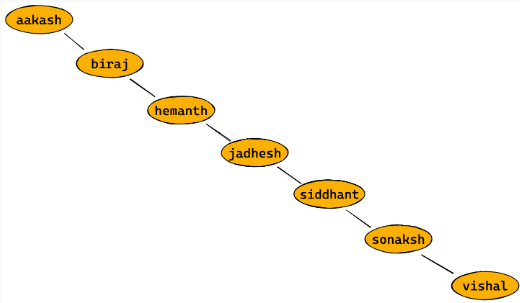

#### Finding a Node in BST

In [40]:
def find(node, key):
    if node is None:
        return None
    if key == node.key:
        return node
    if key < node.key:
        return find(node.left, key)
    if key > node.key:
        return find(node.right, key)

In [48]:
node = find(tree, 'hemanth')

In [49]:
node.key, node.value

('hemanth',
 User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com))

The the length of the path followed by `find` is equal to the height of the tree (in the worst case). Thus it has a similar time complexity as `insert`.

In [50]:
node2 = find(tree, 'vishal')

In [51]:
node2.key, node2.value

('vishal',
 User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com))

#### Updating a value in a BST

We can use `find` to locate the node to be updated, and simply update it's value.

In [41]:
def update(node, key, value):
    target = find(node, key)
    if target is not None:
        target.value = value

In [53]:
update(tree, 'hemanth', User('hemanth', 'Hemanth J', 'hemanthj@example.com'))

User created!


In [54]:
node = find(tree, 'hemanth')
node.value

User(username= hemanth, name= Hemanth J, email= hemanthj@example.com)

#### List the nodes

The nodes can be listed in sorted order by performing an inorder traversal of the BST.

In [24]:
def list_all(node):
    if node is None:
        return []
    return list_all(node.left) + [(node.key, node.value)] + list_all(node.right)

In [56]:
list_all(tree)

[('aakash',
  User(username= aakash, name= Aakash Rai, email= aakash@example.com)),
 ('biraj', User(username= biraj, name= Biraj Das, email= biraj@example.com)),
 ('hemanth',
  User(username= hemanth, name= Hemanth J, email= hemanthj@example.com)),
 ('jadhesh',
  User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com)),
 ('siddhant',
  User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com)),
 ('sonaksh',
  User(username= sonaksh, name= Sonaksh Kumar, email= sonaksh@example.com)),
 ('vishal',
  User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com))]

#### Balanced Binary Tree

Here's a recursive strategy:

1. Ensure that the left subtree is balanced.
2. Ensure that the right subtree is balanced.
3. Ensure that the difference between heights of left subtree and right subtree is not more than 1.

In [57]:
def is_balanced(node):
    if node is None:
        return True, 0
    balanced_l, height_l = is_balanced(node.left)
    balanced_r, height_r = is_balanced(node.right)
    balanced = balanced_l and balanced_r and abs(height_l - height_r) <=1
    height = 1 + max(height_l, height_r)
    return balanced, height

In [58]:
is_balanced(tree)

(True, 3)

In [59]:
is_balanced(tree2)

(False, 7)

#### Balanced Binary Search Trees

We can use a recursive strategy here, turning the middle element of the list into the root, and recursively creating left and right subtrees.

In [1]:
def make_balanced_bst(data, lo=0, hi=None, parent=None):
    if hi is None:
        hi = len(data) - 1
    if lo > hi:
        return None
    
    mid = (lo + hi) // 2
    key, value = data[mid]

    root = BSTNode(key, value)
    root.parent = parent
    root.left = make_balanced_bst(data, lo, mid-1, root)
    root.right = make_balanced_bst(data, mid+1, hi, root)
    
    return root

In [8]:
data = [(user.username, user) for user in users]
data

[('aakash',
  User(username= aakash, name= Aakash Rai, email= aakash@example.com)),
 ('biraj', User(username= biraj, name= Biraj Das, email= biraj@example.com)),
 ('hemanth',
  User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com)),
 ('jadhesh',
  User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com)),
 ('siddhant',
  User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com)),
 ('sonaksh',
  User(username= sonaksh, name= Sonaksh Kumar, email= sonaksh@example.com)),
 ('vishal',
  User(username= vishal, name= Vishal Goel, email= vishal@example.com))]

In [11]:
tree = make_balanced_bst(data)

In [14]:
display_keys(tree)

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


In [17]:
tree3 = None
for username, user in data:
    tree3 = insert(tree3, username, user)

In [18]:
display_keys(tree3)

						vishal
					sonaksh
						∅
				siddhant
					∅
			jadhesh
				∅
		hemanth
			∅
	biraj
		∅
aakash
	∅


#### Balancing an Unbalanced BST

We first perform an inorder traversal, then create a balanced BST using the function defined earlier.

In [19]:
def balance_bst(node):
    return make_balanced_bst(list_all(node))

In [20]:
tree1 = None

for user in users:
    tree1 = insert(tree1, user.username, user)

In [21]:
display_keys(tree1) # Unbalanced tree

						vishal
					sonaksh
						∅
				siddhant
					∅
			jadhesh
				∅
		hemanth
			∅
	biraj
		∅
aakash
	∅


In [25]:
tree2 = balance_bst(tree1)

In [26]:
display_keys(tree2)

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


After every insertion, we can balance the tree. This way the tree will remain balanced.

Complexity of the various operations in a balanced BST:

- Insert - O(log N) + O(N) = O(N)
- Find - O(log N)
- Update - O(log N)
- List all - O(N)

In [27]:
import math
math.log(100000000, 2)

26.5754247590989

The logarithm (base 2) of 100 million is around 26. Thus, it takes only 26 operations to find or update a node within a BST (as opposed to 100 million).

In [31]:
%%time 
for i in range(26):
    j = i*i
# Log time

CPU times: user 22 μs, sys: 5 μs, total: 27 μs
Wall time: 35.8 μs


In [32]:
%%time 
for i in range(100000000):
    j = i*i
# Linear time

CPU times: user 10.7 s, sys: 26.2 ms, total: 10.7 s
Wall time: 8 s


Thus, find and update from a balanced binary search tree is 300,000 times faster than our original solution. To speed up insertions, we may choose to perform the balancing periodically (e.g. once every 1000 insertions). This way, most insertions will be O (log N), but every 1000th insertion will take a few seconds. Another options is to rebalance the tree periodically at the end of every hour.

## A Python-Friendly Treemap

We are now ready to return to our original problem statement. Asuming all username are unique, we can create a generic class `TreeMap` which supports all the operations specified in the original problem statement in a python-friendly manner.

In [42]:
class TreeMap():
    def __init__(self):
        self.root = None
        
    def __setitem__(self, key, value):
        node = find(self.root, key)
        if not node:
            self.root = insert(self.root, key, value)
            self.root = balance_bst(self.root)
        else:
            update(self.root, key, value)
            
        
    def __getitem__(self, key):
        node = find(self.root, key)
        return node.value if node else None
    
    def __iter__(self):
        return (x for x in list_all(self.root))
    
    def __len__(self):
        return tree_size(self.root)
    
    def display(self):
        return display_keys(self.root)

In [43]:
users

[User(username= aakash, name= Aakash Rai, email= aakash@example.com),
 User(username= biraj, name= Biraj Das, email= biraj@example.com),
 User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com),
 User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com),
 User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com),
 User(username= sonaksh, name= Sonaksh Kumar, email= sonaksh@example.com),
 User(username= vishal, name= Vishal Goel, email= vishal@example.com)]

In [44]:
treemap = TreeMap()

In [45]:
treemap.display()

∅


In [46]:
treemap['aakash'] = aakash
treemap['jadhesh'] = jadhesh
treemap['sonaksh'] = sonaksh

In [47]:
treemap.display()

	sonaksh
jadhesh
	aakash


In [48]:
treemap['jadhesh']

User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com)

In [57]:
len(treemap)

7

In [50]:
treemap['biraj'] = biraj
treemap['hemanth'] = hemanth
treemap['siddhant'] = siddhant
treemap['vishal'] = vishal

In [51]:
treemap.display()

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


In [52]:
for key, value in treemap:
    print(key, value)

aakash User(username= aakash, name= Aakash Rai, email= aakash@example.com)
biraj User(username= biraj, name= Biraj Das, email= biraj@example.com)
hemanth User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com)
jadhesh User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com)
siddhant User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com)
sonaksh User(username= sonaksh, name= Sonaksh Kumar, email= sonaksh@example.com)
vishal User(username= vishal, name= Vishal Goel, email= vishal@example.com)


In [58]:
list(treemap)

[('aakash',
  User(username= aakash, name= Aakash Rai, email= aakash@example.com)),
 ('biraj', User(username= biraj, name= Biraj Das, email= biraj@example.com)),
 ('hemanth',
  User(username= hemanth, name= Hemanth Jain, email= hemanth@example.com)),
 ('jadhesh',
  User(username= jadhesh, name= Jadhesh Verma, email= jadhesh@example.com)),
 ('siddhant',
  User(username= siddhant, name= Siddhant Sinha, email= siddhant@example.com)),
 ('sonaksh',
  User(username= sonaksh, name= Sonaksh Kumar, email= sonaksh@example.com)),
 ('vishal',
  User(username= vishal, name= Vishal Goel, email= vishal@example.com))]

In [59]:
treemap['aakash'] = User(username='aakash', name='Aakash N S', email='aakashns@example.com')

User created!


In [60]:
treemap['aakash']

User(username= aakash, name= Aakash N S, email= aakashns@example.com)

### Self Balancing Binaty Trees and AVL Trees

A *self-balancing binary tree* remains balanced after every insertion or deletion. Several decades of research has gone into creating self-balancing binary trees, and many approaches have been devised e.g. B-trees, Red Black Trees and AVL (Adelson-Velsky Landis) trees.

We'll take a brief look at AVL trees. Self-balancing in AVL trees is achieved by tracking the balance factor (difference between the height of the left subtree and the right subtree) for each node and rotating unbalanced subtrees along the path of insertion/deletion to balance them.

In a balanced BST, the balance factor of each node is either 0, -1, or 1. When we perform an insertion, then the balance factor of certain nodes along the path of insertion may change to 2 or -2. Those nodes can be "rotated" one-by-one to bring the balance factor back to 1, 0 or -1.

There are 4 different scenarios for balancing, two of which require a single rotation, while the others require 2 rotations:

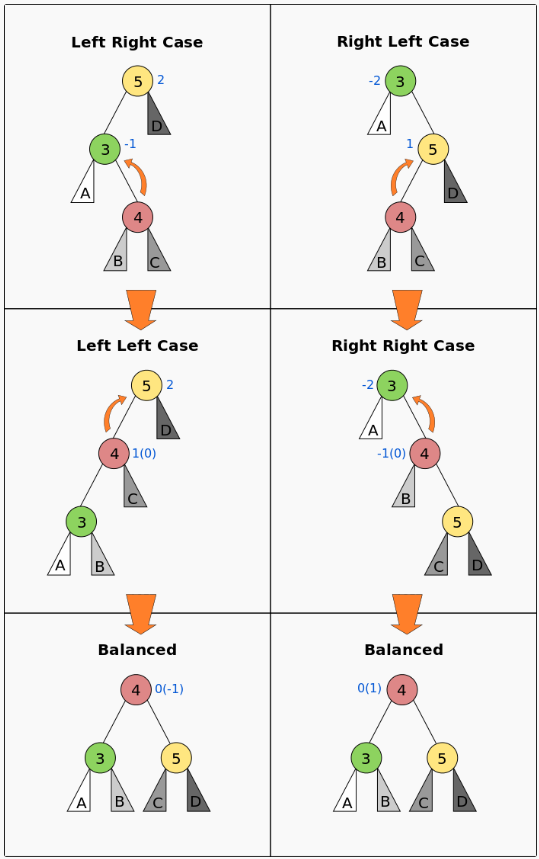

Since each rotation takes constant time, and at most `log N` rotations may be required, this operation is far more efficient than creating a balanced binary tree from scratch, allowing insertion and deletion to be performed in `O (log N)` time.

Binary trees form the basis of many modern programming language features (e.g. maps in C++ and Java) and data storage systems (filesystem indexes, relational databases like MySQL). You might wonder if dictionaries in Python are also binary search trees. They're not. They're hash tables, which is a different but equally interesting and important data structure.